<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/Time_Series_KPIT_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
!cp '/content/drive/MyDrive/KPIT/KPITTECH.NS-1.csv' 'content'

In [5]:
df=pd.read_csv("/content/content")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-27,95.000000,95.750000,92.949997,94.050003,91.428238,563816
1,2019-11-28,93.750000,97.300003,92.400002,94.949997,92.303154,195196
2,2019-11-29,96.400002,98.349998,92.500000,97.900002,95.170929,360778
3,2019-12-02,96.349998,98.800003,96.000000,96.900002,94.198792,200030
4,2019-12-03,96.699997,97.000000,91.000000,91.500000,88.949326,270794
...,...,...,...,...,...,...,...
990,2023-11-22,1485.800049,1489.750000,1417.650024,1445.800049,1445.800049,4220073
991,2023-11-23,1450.000000,1479.849976,1420.099976,1446.449951,1446.449951,2311047
992,2023-11-24,1454.000000,1482.849976,1436.099976,1468.750000,1468.750000,1609569
993,2023-11-28,1482.849976,1507.400024,1477.449951,1489.800049,1489.800049,1138990


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-27,95.000000,95.750000,92.949997,94.050003,91.428238,563816
1,2019-11-28,93.750000,97.300003,92.400002,94.949997,92.303154,195196
2,2019-11-29,96.400002,98.349998,92.500000,97.900002,95.170929,360778
3,2019-12-02,96.349998,98.800003,96.000000,96.900002,94.198792,200030
4,2019-12-03,96.699997,97.000000,91.000000,91.500000,88.949326,270794


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
990,2023-11-22,1485.800049,1489.750000,1417.650024,1445.800049,1445.800049,4220073
991,2023-11-23,1450.000000,1479.849976,1420.099976,1446.449951,1446.449951,2311047
992,2023-11-24,1454.000000,1482.849976,1436.099976,1468.750000,1468.750000,1609569
993,2023-11-28,1482.849976,1507.400024,1477.449951,1489.800049,1489.800049,1138990
994,2023-11-29,1490.500000,1510.949951,1462.400024,1492.599976,1492.599976,1052656


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       995 non-null    object 
 1   Open       995 non-null    float64
 2   High       995 non-null    float64
 3   Low        995 non-null    float64
 4   Close      995 non-null    float64
 5   Adj Close  995 non-null    float64
 6   Volume     995 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.5+ KB


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.duplicated().sum()

0

Candle Stick Chart

In [12]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


Candle Stick Chart with tracel options

In [13]:
fig = go.Figure()
candlestick_trace = go.Candlestick(x=df['Date'],
                                   open=df['Open'],
                                   high=df['High'],
                                   low=df['Low'],
                                   close=df['Close'],
                                   increasing_line_color='green',  # Color for increasing candles
                                   decreasing_line_color='red',    # Color for decreasing candles
                                   showlegend=False,               # Hide legend for this trace
                                   name='Candlesticks')            # Name for the legend
fig.add_trace(candlestick_trace)

moving_average_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=20).mean(),
                                  mode='lines', name='20-day Moving Average', line=dict(color='blue'))
fig.add_trace(moving_average_trace)

fig.update_layout(title='Candlestick Chart with Trace Options',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


Ploting the trading volume to visualize the amount of trading activity.


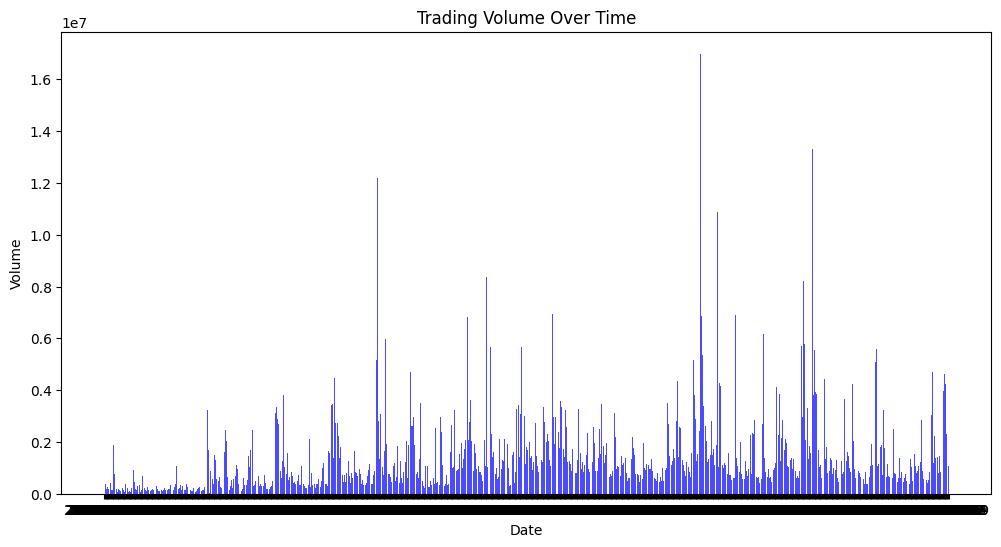

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


Moving Averages:

* Plotting moving averages (e.g., 50-day and 200-day) can help smooth out fluctuations and reveal trends.

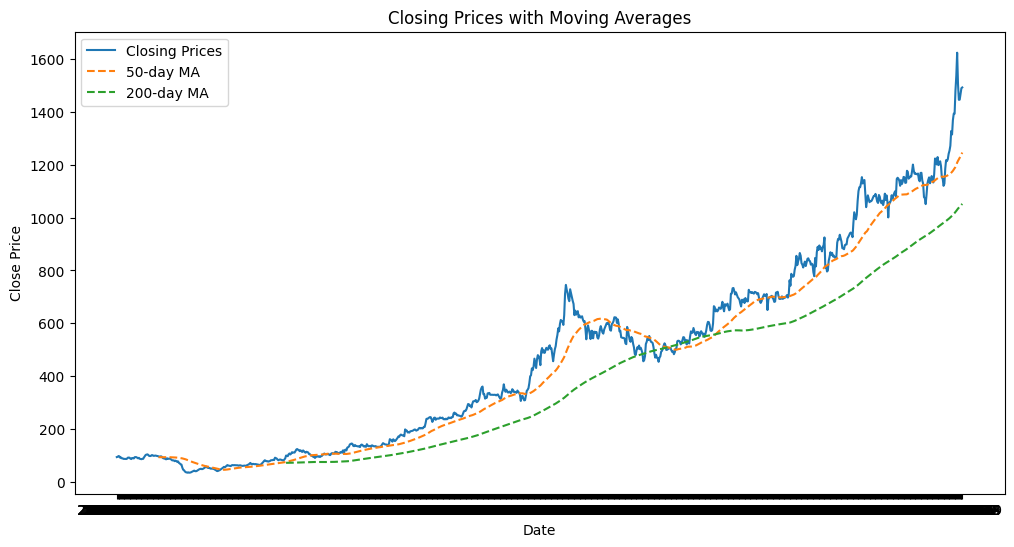

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.plot(df['Date'], df['Close'].rolling(window=50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Date'], df['Close'].rolling(window=200).mean(), label='200-day MA', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
fig = go.Figure()
# Closing Prices trace
closing_prices_trace = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Prices')
fig.add_trace(closing_prices_trace)
# 50-day Moving Average trace
ma_50_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=50).mean(),
                         mode='lines', name='50-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_50_trace)
# 200-day Moving Average trace
ma_200_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=200).mean(),
                          mode='lines', name='200-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_200_trace)
fig.update_layout(title='Closing Prices with Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend=dict(x=0.7, y=0.95))
fig.show()

Autocorrelation Plot:

* Ploting the autocorrelation function (ACF) to identify any patterns or seasonality in the data.


<Figure size 1200x600 with 0 Axes>

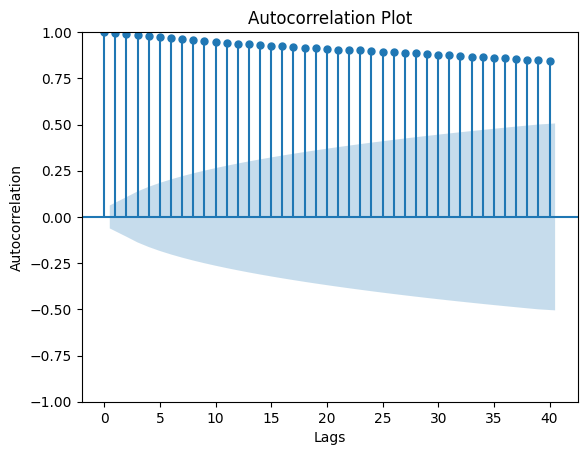

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


In [18]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)

In [19]:
df=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [20]:
df.head(10)

,Date,Close
Date,,
2019-11-27,2019-11-27,94.050003
2019-11-28,2019-11-28,94.949997
2019-11-29,2019-11-29,97.900002
2019-12-02,2019-12-02,96.900002
2019-12-03,2019-12-03,91.500000
2019-12-04,2019-12-04,92.449997
2019-12-05,2019-12-05,89.199997
2019-12-06,2019-12-06,89.000000
2019-12-09,2019-12-09,87.199997


In [21]:
tracel = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=go.Layout(
    title='KPIT:Date X Close',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel],layout=layout)
fig.show()

In [22]:
close_data = df['Close'].values

In [23]:
close_data

array([  94.050003,   94.949997,   97.900002,   96.900002,   91.5     ,
         92.449997,   89.199997,   89.      ,   87.199997,   87.300003,
         87.199997,   86.699997,   88.      ,   91.949997,   92.099998,
         91.75    ,   88.099998,   86.599998,   90.449997,   90.050003,
         88.849998,   93.75    ,   94.      ,   93.699997,   91.449997,
         89.349998,   91.25    ,   87.550003,   86.599998,   86.050003,
         87.300003,   87.349998,   93.099998,   97.949997,  102.349998,
        103.550003,  104.400002,  102.349998,   98.349998,   98.      ,
         98.300003,  101.349998,  101.199997,   98.900002,   98.849998,
         99.699997,   99.449997,   98.449997,   97.900002,   96.900002,
         95.349998,   96.099998,   96.900002,   95.150002,   91.050003,
         88.949997,   89.800003,   87.199997,   85.449997,   89.650002,
         87.150002,   87.550003,   88.349998,   86.650002,   85.099998,
         81.75    ,   81.75    ,   81.449997,   78.650002,   80.

In [24]:
close_data=close_data.reshape(-1,1)
close_data

array([[  94.050003],
       [  94.949997],
       [  97.900002],
       [  96.900002],
       [  91.5     ],
       [  92.449997],
       [  89.199997],
       [  89.      ],
       [  87.199997],
       [  87.300003],
       [  87.199997],
       [  86.699997],
       [  88.      ],
       [  91.949997],
       [  92.099998],
       [  91.75    ],
       [  88.099998],
       [  86.599998],
       [  90.449997],
       [  90.050003],
       [  88.849998],
       [  93.75    ],
       [  94.      ],
       [  93.699997],
       [  91.449997],
       [  89.349998],
       [  91.25    ],
       [  87.550003],
       [  86.599998],
       [  86.050003],
       [  87.300003],
       [  87.349998],
       [  93.099998],
       [  97.949997],
       [ 102.349998],
       [ 103.550003],
       [ 104.400002],
       [ 102.349998],
       [  98.349998],
       [  98.      ],
       [  98.300003],
       [ 101.349998],
       [ 101.199997],
       [  98.900002],
       [  98.849998],
       [  

In [25]:
split_percentage=0.80
split=int(split_percentage * len(close_data))
split

796

In [26]:
close_train = close_data[:split]
close_test = close_data[split:]

In [27]:
print(len(close_train))
print(len(close_test))

796
199


In [39]:
date_train = df['Date'][:split]
date_test = df['Date'][split:]

In [40]:
print(len(date_train))
print(len(date_test))

796
199


In [28]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.preprocessing .sequence import TimeseriesGenerator


In [29]:
look_back=15
train_generator = TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=30)

In [30]:
test_generator = TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=5)

In [31]:
model = Sequential()
model.add(
    LSTM(10, activation='relu', input_shape=(look_back, 1))
)
model.add(
    Dense(1)
)


In [32]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='mse')

In [33]:
model.fit(train_generator,epochs=100)

Epoch 1/100
27/27 [==============================] - 11s 58ms/step - loss: 472758.2500
Epoch 2/100
27/27 [==============================] - 1s 49ms/step - loss: 421706.8125
Epoch 3/100
27/27 [==============================] - 1s 51ms/step - loss: 389402.7500
Epoch 4/100
27/27 [==============================] - 1s 52ms/step - loss: 363801.8125
Epoch 5/100
27/27 [==============================] - 1s 35ms/step - loss: 339755.9375
Epoch 6/100
27/27 [==============================] - 2s 56ms/step - loss: 219938.1719
Epoch 7/100
27/27 [==============================] - 1s 47ms/step - loss: 9179.4043
Epoch 8/100
27/27 [==============================] - 1s 47ms/step - loss: 613.2658
Epoch 9/100
27/27 [==============================] - 1s 21ms/step - loss: 475.4695
Epoch 10/100
27/27 [==============================] - 1s 23ms/step - loss: 499.7879
Epoch 11/100
27/27 [==============================] - 1s 23ms/step - loss: 458.7083
Epoch 12/100
27/27 [==============================] - 1s 22ms/ste

In [42]:
model.save('kpit1.keras')

In [34]:
prediction = model.predict_generator(test_generator)

<ipython-input-34-342c80f366ab>:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [35]:
prediction

array([[ 845.32855],
       [ 867.2275 ],
       [ 853.4711 ],
       [ 874.5751 ],
       [ 872.48755],
       [ 844.66327],
       [ 832.20953],
       [ 867.0231 ],
       [ 831.9455 ],
       [ 810.19147],
       [ 803.26117],
       [ 846.46124],
       [ 837.113  ],
       [ 874.2651 ],
       [ 913.7636 ],
       [ 880.7681 ],
       [ 920.67426],
       [ 882.6542 ],
       [ 915.68066],
       [ 881.9193 ],
       [ 929.93976],
       [ 891.847  ],
       [ 956.831  ],
       [ 876.2502 ],
       [ 841.26654],
       [ 816.43866],
       [ 803.4448 ],
       [ 861.7946 ],
       [ 876.2248 ],
       [ 910.5704 ],
       [ 879.6753 ],
       [ 906.5024 ],
       [ 861.3635 ],
       [ 893.07245],
       [ 857.01996],
       [ 893.6084 ],
       [ 882.37396],
       [ 909.4185 ],
       [ 949.98944],
       [ 924.08765],
       [ 958.56085],
       [ 921.3551 ],
       [ 944.6773 ],
       [ 895.4249 ],
       [ 927.5402 ],
       [ 917.62085],
       [ 940.8122 ],
       [ 894.

In [36]:
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction=prediction.flatten()

In [37]:
prediction

array([ 845.32855,  867.2275 ,  853.4711 ,  874.5751 ,  872.48755,
        844.66327,  832.20953,  867.0231 ,  831.9455 ,  810.19147,
        803.26117,  846.46124,  837.113  ,  874.2651 ,  913.7636 ,
        880.7681 ,  920.67426,  882.6542 ,  915.68066,  881.9193 ,
        929.93976,  891.847  ,  956.831  ,  876.2502 ,  841.26654,
        816.43866,  803.4448 ,  861.7946 ,  876.2248 ,  910.5704 ,
        879.6753 ,  906.5024 ,  861.3635 ,  893.07245,  857.01996,
        893.6084 ,  882.37396,  909.4185 ,  949.98944,  924.08765,
        958.56085,  921.3551 ,  944.6773 ,  895.4249 ,  927.5402 ,
        917.62085,  940.8122 ,  894.8438 ,  940.1349 ,  938.16437,
        928.19684,  969.42896,  940.63916,  982.4178 ,  980.5345 ,
        969.28156,  988.6701 , 1031.3362 , 1044.8622 , 1035.3387 ,
       1038.0009 , 1083.4093 , 1108.3187 , 1143.0692 , 1146.6768 ,
       1179.3301 , 1198.1791 , 1135.2506 , 1142.0585 , 1154.287  ,
       1128.879  , 1049.8542 , 1113.0026 , 1124.8417 , 1085.38

In [41]:
tracel2 = go.Scatter(
    x=date_train,
    y=close_train,
    mode='lines',
    name='Date'
)

tracel3 = go.Scatter(
    x=date_test,
    y=close_test,
    mode='lines',
    name='test data'
)

tracel4 = go.Scatter(
    x=date_test,
    y=prediction,
    mode = 'lines',
    name='prediction'
)
layout = go.Layout(
    title='KPIT Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel2,tracel3,tracel4],layout=layout)
fig.show()